In [1]:
import moviepy
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Motion Dataset

In [2]:
import sys
sys.path.append('/home/yoonbyung/flame')
from src.utils.vis_util import render_video_summary

In [20]:
motion_path = 'flame/data/amass_download_smplhg/ACCAD/ACCAD/Female1Gestures_c3d/D1 - Urban 1_poses.npz'
path = os.path.join(os.path.abspath('..'),  motion_path)
data = np.load(path)
keys = data.files
print(keys)
poses = data['poses'][:,3:66]
pose3D = poses[0,:].reshape(-1,3)
pose3D.shape

['trans', 'gender', 'mocap_framerate', 'betas', 'dmpls', 'poses']


(21, 3)

In [ ]:
render_video_summary(
                #img_ids=[f"{label_wos}_guidance{guidance_scale}_L{motion_length}"],
                img_ids=[f"test"],
                translations=generated_motions[:, :motion_length, :3],
                rotation_6ds=generated_motions[:, :motion_length, 3:],
                annotations=[ann],
                fps=fps,
                write=True,
)

# Random 3D data

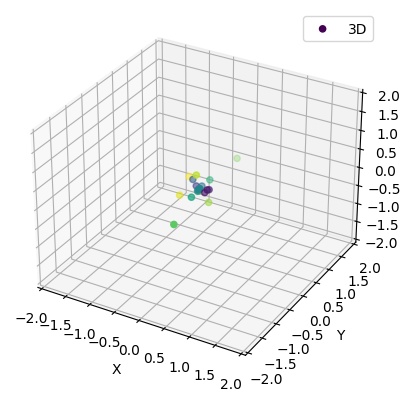

In [22]:
ax = plt.figure().add_subplot(projection='3d')

# poses3D = np.random.randn(10,3)
poses3D = pose3D
ax.scatter(poses3D[:,0], poses3D[:,1], zs=poses3D[:,2], zdir='y', c=range(len(poses3D)), label='3D')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
# ax.view_init(elev=20., azim=-35, roll=0)

plt.savefig('3D')

In [28]:
rvecs = np.float32([[0], [0], [0]])
tvecs = np.float32([[0], [0.5], [0]])
mtx = np.float32([
    [0.1,   0,      0.1],
    [0,     0.1,    0.1],
    [0,     0,      1]
])
dist = 0
poses2D, jac = cv2.projectPoints(poses3D, rvecs, tvecs, mtx, dist)
# poses2D

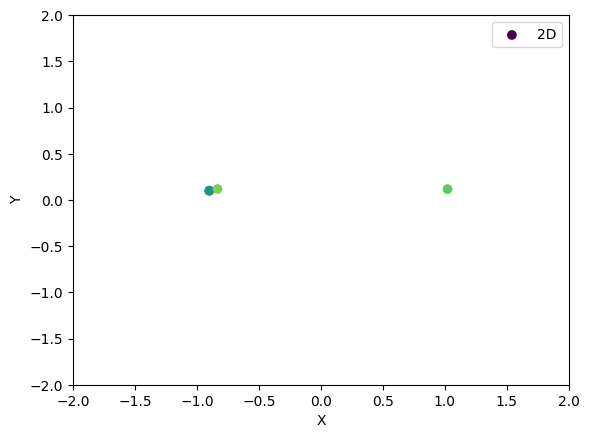

In [29]:
ax = plt.figure().add_subplot()

ax.scatter(poses2D[:,0,0], poses2D[:,0,1], c=range(len(poses2D)), label='2D')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
# ax.view_init(elev=20., azim=-35, roll=0)

plt.savefig('2D')